# Utilities for large scale climate data analysis
The `xarrayutils.utils` module contains several functions that have proven useful in several of my day to day projects with both observational and model data.

## Linear regression
One of the operations many scientists do is calculating a linear trend along a specified dimension (e.g. time) on each grid point of a dataset. `linear_trend` makes this very easy. For demonstration purposes lets load some monthly gridded Argo data from [APDRC](http://apdrc.soest.hawaii.edu/dods/public_data/Argo_Products/monthly_mean/monthly_mixed_layer.info)

In [11]:
import xarray as xr
import numpy as np

%matplotlib inline

In [12]:
path = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/Argo_Products/monthly_mean/monthly_mixed_layer'
ds = xr.open_dataset(path, use_cftime=True)
ds

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, time: 240)
Coordinates:
  * time     (time) object 2001-01-15 00:00:00 ... 2020-12-15 00:00:00
  * lat      (lat) float64 -88.5 -85.5 -82.5 -79.5 -76.5 ... 79.5 82.5 85.5 88.5
  * lon      (lon) float64 1.5 4.5 7.5 10.5 13.5 ... 349.5 352.5 355.5 358.5
Data variables:
    mld      (time, lat, lon) float32 ...
    smld     (time, lat, lon) float32 ...
    nmld     (time, lat, lon) float32 ...
    ild      (time, lat, lon) float32 ...
    sild     (time, lat, lon) float32 ...
    nild     (time, lat, lon) float32 ...
    ttd      (time, lat, lon) float32 ...
    sttd     (time, lat, lon) float32 ...
    nttd     (time, lat, lon) float32 ...
    blt      (time, lat, lon) float32 ...
    sblt     (time, lat, lon) float32 ...
    nblt     (time, lat, lon) float32 ...
    tid      (time, lat, lon) float32 ...
    stid     (time, lat, lon) float32 ...
    ntid     (time, lat, lon) float32 ...
    mlt      (time, lat, lon) float32 ...
    smlt 

Lets find out how much the salinity in each grid point changed over the full period (20 years)

In [13]:
from xarrayutils.utils import linear_trend

In [14]:
# create an array 
salinity_regressed = linear_trend(ds.mls, 'time')
salinity_regressed

<xarray.Dataset>
Dimensions:    (lat: 60, lon: 120)
Coordinates:
  * lat        (lat) float64 -88.5 -85.5 -82.5 -79.5 ... 79.5 82.5 85.5 88.5
  * lon        (lon) float64 1.5 4.5 7.5 10.5 13.5 ... 349.5 352.5 355.5 358.5
Data variables:
    slope      (lat, lon) float64 nan nan nan nan ... 0.08067 0.07533 -0.005028
    intercept  (lat, lon) float64 nan nan nan nan ... 20.33 22.07 22.88 32.38
    r_value    (lat, lon) float64 nan nan nan nan nan ... 1.0 0.9608 1.0 -0.116
    p_value    (lat, lon) float64 nan nan nan nan nan ... nan 0.03919 nan 0.884
    std_err    (lat, lon) float64 nan nan nan nan ... inf 0.01646 inf 0.03045

Now we can plot the slope as a map

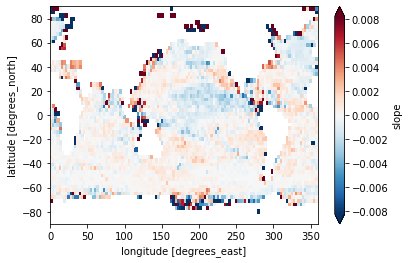

In [15]:
salinity_regressed.slope.plot(robust=True)

`linear_trend` converts the dimension over which to integrate into logical indicies, so the units of the plot above are (salinity/timestep of the original product), so here PSS/month.

## Correlation maps

But what about a bit more complex task? Lets find out how mixedlayer salinity and temperature correlate. For this we use `xr_linregress` (for which `linear_trend` is just a thin wrapper):

In [16]:
from xarrayutils.utils import linear_trend, xr_linregress

In [17]:
tempxsalt = xr_linregress(ds.mlt, ds.mls, dim='time')

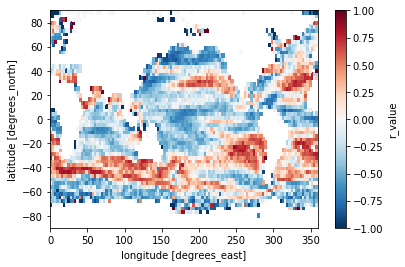

In [18]:
tempxsalt.r_value.plot()

This works in any dimension the dataset has:

In [19]:
tempxsalt = xr_linregress(ds.mlt, ds.mls, dim='lon')

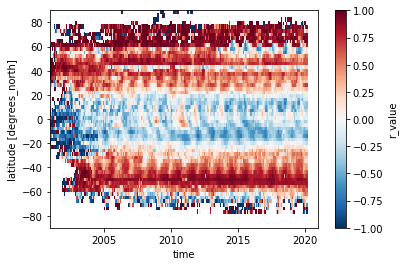

In [20]:
tempxsalt.r_value.plot(x='time')

This map shows that in lower latitudes spatial patterns of salinity are generally anticorrlated with temperature and vice versa in the high latitudes.